# Exploring the Scraped Cookie database

**Now running on Python3**

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

### Table of Contents
  
* [**Table Information**](#Get-table-information)  
* [**Table headers**](#Individual-table-dumps)
  * [Profile Cookies](#Profile-Cookies)  
  * [Local Storage](#Local-Storage)  
  * [Crawl History](#Crawl-History)
* [Data Exploration](#Further-Exploration)
  * [Failed Crawls](#Failed-crawl-history)
  * [Popular Domains](#Most-popular-base-domains)
  * [Popular Scopes](#Most-popular-scopes)
  * [Popular cookie names](#Most-popular-cookies)
  * [Cookies by Host](#Counting-cookies-by-host)
  * [Cookies by URL](#Counting-cookies-by-page_url)


## Get table information

In [2]:
# Connect to SQLite database
con = sqlite3.connect("../data/top_100_shallow_1.sqlite")

cur = con.cursor()

In [22]:
# Get tables in database
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';")

table_names = [ x[0] for x in cur.fetchall() ]
table_names

['task',
 'sqlite_sequence',
 'crawl',
 'xpath',
 'http_requests',
 'http_responses',
 'flash_cookies',
 'profile_cookies',
 'localStorage',
 'CrawlHistory',
 'http_cookies']

In [23]:
# Initialize dictionary with information for each table
db_info = {}

In [24]:
# Get counts
count_query = "SELECT COUNT(*) FROM {table};"
cols_query = "PRAGMA table_info('{table}');"

for t in table_names:
    # get counts
    cur.execute( count_query.format(table=t) )
    _cnt = int( cur.fetchall()[0][0] )
    
    # get cols
    cur.execute( cols_query.format(table=t) )
    _cols = [ c[1].encode() for c in cur.fetchall() ]
    
    db_info[t] = {'count': _cnt, 'cols': _cols}

In [26]:
for t, info in db_info.items():
    print('{tab}\n'.format(tab=t), '=' * len(t))
    print(' COUNT: ', info['count'])
    print(' COLS: ', info['cols'], '\n')

CrawlHistory
 COUNT:  200
 COLS:  [b'crawl_id', b'command', b'arguments', b'bool_success', b'dtg'] 

localStorage
 COUNT:  909
 COLS:  [b'id', b'crawl_id', b'page_url', b'scope', b'KEY', b'value'] 

sqlite_sequence
 COUNT:  7
 COLS:  [b'name', b'seq'] 

profile_cookies
 COUNT:  6322
 COLS:  [b'id', b'crawl_id', b'page_url', b'baseDomain', b'name', b'value', b'host', b'path', b'expiry', b'accessed', b'creationTime', b'isSecure', b'isHttpOnly'] 

task
 ====
 COUNT:  1
 COLS:  [b'task_id', b'start_time', b'description'] 

http_responses
 COUNT:  16278
 COLS:  [b'id', b'crawl_id', b'url', b'method', b'referrer', b'response_status', b'response_status_text', b'headers', b'location', b'top_url', b'time_stamp'] 

flash_cookies
 COUNT:  5
 COLS:  [b'id', b'crawl_id', b'page_url', b'domain', b'filename', b'local_path', b'key', b'content'] 

xpath
 =====
 COUNT:  0
 COLS:  [b'id', b'name', b'url', b'xpath', b'absolute_xpath', b'ctime'] 

http_cookies
 COUNT:  0
 COLS:  [b'id', b'crawl_id', b'head

In [6]:
# Get FULL table schema in database
cur.execute("SELECT sql FROM sqlite_master WHERE type = 'table';")

all_tables = cur.fetchall()

for t in all_tables:
    print t[0] + '\n'

CREATE TABLE task (
    task_id INTEGER PRIMARY KEY AUTOINCREMENT,
    start_time DATETIME DEFAULT CURRENT_TIMESTAMP,
    description TEXT)

CREATE TABLE sqlite_sequence(name,seq)

CREATE TABLE crawl (
    crawl_id INTEGER PRIMARY KEY AUTOINCREMENT,
    task_id INTEGER,
    start_time DATETIME DEFAULT CURRENT_TIMESTAMP,
    profile VARCHAR(200),
    browser VARCHAR(200),
    headless VARCHAR(200),
    proxy VARCHAR(200),
    debugging VARCHAR(200),
    disable_flash VARCHAR(200),
    extensions VARCHAR(200),
    screen_res VARCHAR(50),
    ua_string VARCHAR(200),
    finished BOOLEAN NOT NULL DEFAULT 0,
    FOREIGN KEY(task_id) REFERENCES task(task_id))

CREATE TABLE xpath (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name VARCHAR(100) NOT NULL,
    url VARCHAR(500) NOT NULL,
    xpath VARCHAR(500) NOT NULL,
    absolute_xpath VARCHAR(500),
    ctime DATETIME DEFAULT CURRENT_TIMESTAMP,
    UNIQUE(name, url))

CREATE TABLE http_requests (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    

## Individual table dumps

In [7]:
get_head_query = "SELECT * FROM {table} LIMIT {cnt};"

* ### Task

In [8]:
# Dump TASK table
pd.read_sql_query(get_head_query.format(table='task',cnt=7), con)

,task_id,start_time,description
0,1,2015-07-14 20:38:37,None


* ### Profile Cookies

In [9]:
# Dump PROFILE_COOKIES table
pd.read_sql_query(get_head_query.format(table='profile_cookies',cnt=7), con)

,id,crawl_id,page_url,baseDomain,name,value,host,path,expiry,accessed,creationTime,isSecure,isHttpOnly
0,1,1,http://google.com,google.com,PREF,ID=1111111111111111:FF=0:TM=1436906302:LM=1436...,.google.com,/,1499978320,1436906320429022,1436906320429022,0,0
1,2,1,http://google.com,google.com,NID,69=QjonilIW3NrJTI3h12fdRQ3Gdy2g6DifOxZwlZS9X_v...,.google.com,/,1452717520,1436906320704467,1436906320429855,0,1
2,3,1,http://google.com,google.com,OGPC,5061451-1:,.google.com,/,1439498321,1436906321416369,1436906321416369,0,0
3,4,1,http://youtube.com,youtube.com,VISITOR_INFO1_LIVE,t4rCUKtDEzQ,.youtube.com,/,1457944310,1436906330561222,1436906330561222,0,1
4,5,1,http://youtube.com,youtube.com,PREF,f5=30,.youtube.com,/,1499978333,1436906333416922,1436906333416922,0,0
5,6,1,http://youtube.com,doubleclick.net,id,22050e441c0400cc||t=1436906316|et=730|cs=00221...,.doubleclick.net,/,1499978334,1436906334258111,1436906334258111,0,0
6,7,1,http://youtube.com,pointroll.com,PRTEST,1,.ads.pointroll.com,/,1499978334,1436906334341091,1436906334341091,0,0


* ### HTTP Responses

In [10]:
# Dump HTTP_RESPONSES table
pd.read_sql_query(get_head_query.format(table='http_responses',cnt=4), con)

,id,crawl_id,url,method,referrer,response_status,response_status_text,headers,location,top_url,time_stamp
0,1,1,http://google.com/,GET,,301,Moved Permanently,"[['Location', 'http://www.google.com/'], ['Con...",http://www.google.com/,http://google.com,2015-07-14 20:38:40.386276
1,2,1,http://www.google.com/,GET,,302,Found,"[['Location', 'https://www.google.com/?gws_rd=...",https://www.google.com/?gws_rd=ssl,http://google.com,2015-07-14 20:38:40.428456
2,3,1,https://www.google.com/?gws_rd=ssl,GET,,200,OK,"[['Date', 'Tue, 14 Jul 2015 20:38:22 GMT'], ['...",,http://google.com,2015-07-14 20:38:40.702652
3,4,1,https://www.google.com/logos/doodles/2015/new-...,GET,https://www.google.com/?gws_rd=ssl,200,OK,"[['Content-Type', 'image/png'], ['Last-Modifie...",,http://google.com,2015-07-14 20:38:40.853772


* ### SQLite Sequence

In [11]:
# Dump SQLITE_SEQUENCE table
pd.read_sql_query(get_head_query.format(table='sqlite_sequence',cnt=10), con)

,name,seq
0,task,1
1,crawl,1
2,http_requests,16297
3,http_responses,16278
4,profile_cookies,6322
5,flash_cookies,5
6,localStorage,909


* ### HTTP Requests

In [12]:
# Dump HTTP_REQUESTS table
pd.read_sql_query(get_head_query.format(table='http_requests',cnt=5), con)

,id,crawl_id,url,method,referrer,headers,top_url,time_stamp
0,1,1,http://google.com/,GET,,"[['Host', 'google.com'], ['User-Agent', 'Mozil...",http://google.com,2015-07-14 20:38:40.342442
1,2,1,http://www.google.com/,GET,,"[['Host', 'www.google.com'], ['User-Agent', 'M...",http://google.com,2015-07-14 20:38:40.393791
2,3,1,https://www.google.com/?gws_rd=ssl,GET,,"[['Host', 'www.google.com'], ['User-Agent', 'M...",http://google.com,2015-07-14 20:38:40.586784
3,4,1,https://tiles.services.mozilla.com/v3/links/fe...,GET,,"[['Host', 'tiles.services.mozilla.com'], ['Use...",http://google.com,2015-07-14 20:38:40.812161
4,5,1,https://www.google.com/logos/doodles/2015/new-...,GET,https://www.google.com/?gws_rd=ssl,"[['Host', 'www.google.com'], ['User-Agent', 'M...",http://google.com,2015-07-14 20:38:40.840828


* ### HTTP Cookies

In [13]:
# Dump HTTP_COOKIES table
pd.read_sql_query(get_head_query.format(table='http_cookies',cnt=5), con)

,id,crawl_id,header_id,http_type,name,value,domain,path,expires,max_age,httponly,secure,comment,version,accessed


* ### Local Storage

In [14]:
# Dump LOCAL_STORAGE table
pd.read_sql_query(get_head_query.format(table='localStorage',cnt=10), con)

,id,crawl_id,page_url,scope,KEY,value
0,1,1,http://youtube.com,moc.ebutuoy.www.:https:443,yt-player-two-stage-token,"{""data"":""{}"",""expiration"":1436906635665,""creat..."
1,2,1,http://youtube.com,moc.ebutuoy.www.:https:443,yt-remote-device-id,"{""data"":""a379909a-6707-46f0-a909-833d8b957b91""..."
2,3,1,http://youtube.com,moc.ebutuoy.www.:https:443,yt-remote-online-screens,"{""data"":""[]"",""expiration"":1436906395676,""creat..."
3,4,1,http://youtube.com,moc.ebutuoy.www.:https:443,yt-remote-connected-devices,"{""data"":""[]"",""expiration"":1436992735677,""creat..."
4,5,1,http://msn.com,moc.koobecaf.www.:https:443,sp_pi,"{""pageInfo"":{""scriptPath"":""/index.php"",""catego..."
5,6,1,http://msn.com,moc.koobecaf.www.:https:443,bz:rcq2sb.1436906348279,"[[""script_path_change"",{""source_path"":null,""so..."
6,7,1,http://yelp.com,moc.nsm.www.:http:80,_chartbeat4,t=rML3ZCXeB3ThcQdrCG2tNKCLEI5k&E=0&x=0&c=0.06&...
7,8,1,http://yelp.com,moc.nsm.www.:http:80,_chartbeat4_expires,1436909958710
8,9,1,http://yelp.com,moc.nsm.www.:http:80,_chartbeat2,BL9Y6GClGa_RDB-KnC.1436906355226.1436906355226.1
9,10,1,http://yelp.com,moc.nsm.www.:http:80,_chartbeat2_expires,1499978355229


* ### Crawl

In [15]:
# Dump CRAWL table
pd.read_sql_query(get_head_query.format(table='crawl',cnt=4), con)

,crawl_id,task_id,start_time,profile,browser,headless,proxy,debugging,disable_flash,extensions,screen_res,ua_string,finished
0,1,1,2015-07-14 20:38:37,None,firefox,1,1,0,0,None,"(1366, 768)",None,1


* ### Crawl History

In [16]:
# Dump CRAWL_HISTORY table
pd.read_sql_query(get_head_query.format(table='CrawlHistory',cnt=5), con)

,crawl_id,command,arguments,bool_success,dtg
0,1,GET,http://google.com,1,2015-07-14 20:38:44
1,1,DUMP_STORAGE_VECTORS,http://google.com,1,2015-07-14 20:38:46
2,1,GET,http://youtube.com,1,2015-07-14 20:38:57
3,1,DUMP_STORAGE_VECTORS,http://youtube.com,1,2015-07-14 20:39:00
4,1,GET,http://facebook.com,1,2015-07-14 20:39:07


* ### Flash Cookies

In [17]:
# Dump FLASH_COOKIES table
pd.read_sql_query(get_head_query.format(table='flash_cookies',cnt=7), con)

,id,crawl_id,page_url,domain,filename,local_path,key,content
0,1,1,http://youtube.com,s.ytimg.com,soundData.sol,963532TV/s.ytimg.com/soundData.sol,volume,50
1,2,1,http://youtube.com,s.ytimg.com,soundData.sol,963532TV/s.ytimg.com/soundData.sol,mute,True
2,3,1,http://cnn.com,z.cdn.turner.com,octoshapeuserinfo.sol,963532TV/z.cdn.turner.com/octoshapeuserinfo.sol,userplayerid,9402584852
3,4,1,http://cnn.com,z.cdn.turner.com,mutedPersistence.sol,963532TV/z.cdn.turner.com/mutedPersistence.sol,muted,True
4,5,1,http://cnn.com,z.cdn.turner.com,HDCore.sol,963532TV/z.cdn.turner.com/xslo/cvp/core/player...,bandwidth,931152


## Further Exploration

It seems the interesting tables for us will be:  
* `profile_cookies` and `localStorage` (for all the meat)  
* `CrawlHistory` for possible additional metadata (although the `page_url` is already included in the *meat* tables)

### Failed crawl history

In [18]:
pd.read_sql_query('SELECT bool_success, COUNT(*) AS count FROM CrawlHistory GROUP BY bool_success;', con)

,bool_success,count
0,-1,2
1,1,198


In [19]:
pd.read_sql_query('SELECT * FROM CrawlHistory WHERE bool_success = -1;', con)

,crawl_id,command,arguments,bool_success,dtg
0,1,GET,http://nydailynews.com,-1,2015-07-14 20:46:33
1,1,DUMP_STORAGE_VECTORS,http://moviepilot.com,-1,2015-07-14 21:00:04


### Most popular base domains

In [20]:
# Get number of different base domains
cur.execute('SELECT baseDomain, COUNT(*) FROM profile_cookies GROUP BY baseDomain;')

r = cur.fetchall()
print len(r)

358


In [21]:
base_domains = pd.read_sql_query('SELECT baseDomain, COUNT(*) as count FROM profile_cookies GROUP BY baseDomain;', con)

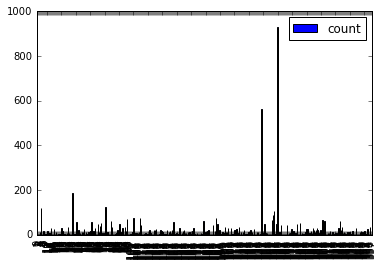

In [23]:
base_domains.plot(kind='bar')
plt.show()

In [25]:
morethan10 = base_domains[ base_domains['count'] >= 10 ]
morethan10.shape

(140, 2)

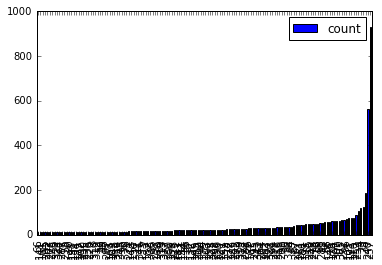

In [38]:
morethan10.sort_values('count').plot(kind='bar')
plt.show()

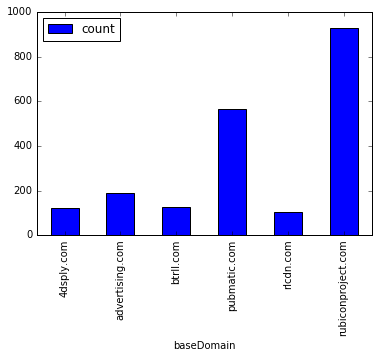

In [27]:
morethan100 = morethan10[ morethan10['count'] >= 100 ]
morethan100.set_index('baseDomain', inplace=True)
morethan100.plot(kind='bar')
plt.show()

In [28]:
pd.read_sql_query('SELECT DISTINCT page_url FROM profile_cookies WHERE baseDomain = "rubiconproject.com";', con)

,page_url
0,http://yelp.com
1,http://amazon.com
2,http://wikia.com
3,http://whitepages.com
4,http://urbandictionary.com
5,http://walmart.com
6,http://wayfair.com
7,http://ask.com
8,http://nydailynews.com
9,http://nytimes.com


### Most popular scopes

In [29]:
# Get number of different scopes
cur.execute('SELECT scope, COUNT(*) as count FROM localStorage GROUP BY scope;')

r = cur.fetchall()
print len(r)

67


In [30]:
scopes = pd.read_sql_query('SELECT scope, COUNT(*) as count FROM localStorage GROUP BY scope;', con)

In [36]:
scopes.head()

,scope,count
0,gro.allizom.www.:https:443,2
1,moc.aikiw.www.:http:80,35
2,moc.alayoo.reyalp.:http:80,1
3,moc.bdmi.www.:http:80,1
4,moc.cim.:http:80,1


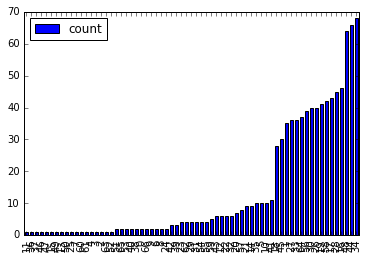

In [37]:
scopes.sort_values('count').plot(kind='bar')

In [58]:
scopes.sort_values(by='count', ascending=False, inplace=True)
scopes.head()

,scope,count
34,moc.rekwag.:http:80,68
44,moc.semityn.www.:http:80,66
48,moc.swencbn.www.:http:80,64
16,moc.enilnoe.www.:http:80,46
28,moc.noitanbs.www.:http:80,45


In [72]:
pd.read_sql_query('SELECT DISTINCT page_url FROM localStorage WHERE scope = "moc.rekwag.:http:80";', con)

,page_url
0,http://gawker.com
1,http://vox.com


In [80]:
pd.read_sql_query('SELECT DISTINCT page_url FROM localStorage WHERE scope LIKE "%semityn%";', con)

,page_url
0,http://nytimes.com
1,http://mozilla.org


### Most popular cookies

In [74]:
# Get number of different cookies
cur.execute('SELECT name, COUNT(*) as count FROM profile_cookies GROUP BY name;')

r = cur.fetchall()
print len(r)

1358


In [75]:
cookies = pd.read_sql_query('SELECT name, COUNT(*) as count FROM profile_cookies GROUP BY name;', con)
cookies.sort_values(by='count', ascending=False, inplace=True)
cookies.head()

,name,count
1292,uid,81
481,_ga,61
386,__qca,60
1279,u,51
1310,uuid,48


### Counting cookies by host

In [39]:
# Get number of different cookies
_qry = 'SELECT host, COUNT(DISTINCT name) as count_dist, COUNT(name) as count FROM profile_cookies GROUP BY host;'
host_cookies = pd.read_sql_query(_qry, con)

host_cookies.shape

(527, 3)

In [40]:
host_cookies.sort_values(by='count', ascending=False, inplace=True)

In [41]:
host_cookies.head()

,host,count_dist,count
272,.rubiconproject.com,71,900
255,.pubmatic.com,65,532
48,.advertising.com,9,156
415,engine.4dsply.com,24,120
438,pix.btrll.com,49,113


### Counting cookies by page_url

In [42]:
# Get number of different cookies
q = 'SELECT page_url,COUNT(DISTINCT name) AS count_dist,COUNT(name) AS count FROM profile_cookies GROUP BY page_url;'
url_cookies = pd.read_sql_query(_qry, con)

url_cookies.shape

(527, 3)

In [43]:
url_cookies.sort_values(by='count_dist', ascending=False, inplace=True)

In [44]:
url_cookies.head()

,host,count_dist,count
272,.rubiconproject.com,71,900
255,.pubmatic.com,65,532
438,pix.btrll.com,49,113
269,.rlcdn.com,38,105
339,.wayfair.com,35,35
